<a href="https://colab.research.google.com/github/nitika-bhatt/Employee-attrition-using-machine-learning-/blob/main/Minor_Project(Employee_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#initially we will import all the libraries like pandas, numpy, matplotlib, seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#next step is to get the dataset on what we need to predict the employee turnover
from google.colab import files
uploaded = files.upload()


Saving hr_data.csv to hr_data (1).csv


In [ ]:
#after importing the file we will read it 
df=pd.read_csv("hr_data.csv")

In [ ]:
df.shape

(14999, 10)

In [ ]:
#get the number of rows with missing values
df.isna()
df.head()
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
#check if there is any duplicate or not
df.duplicated(keep='first').sum()

3008

In [ ]:
#remove these duplicates in order to have the good dataset
df.drop_duplicates(inplace=True)


In [ ]:
#check the number of rows after you have dropped the duplicates
df.shape

(11991, 10)

In [ ]:
##Deep analysis of each features we have taken --------->exploratory data
#number of project
a=df["number_project"].unique()
print(a) 

[2 5 7 6 4 3]


In [ ]:
b=len(a)


In [ ]:
print(b)

6


In [ ]:
#plot a histogram that shows the number of projects of the employes
sns.histplot??


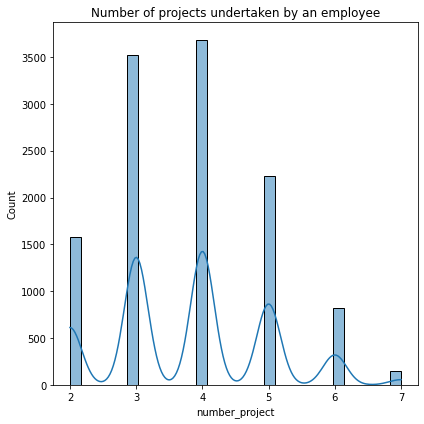

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(data=df,x=df["number_project"], kde=True)
plt.title("Number of projects undertaken by an employee")
plt.tight_layout()
plt.show()


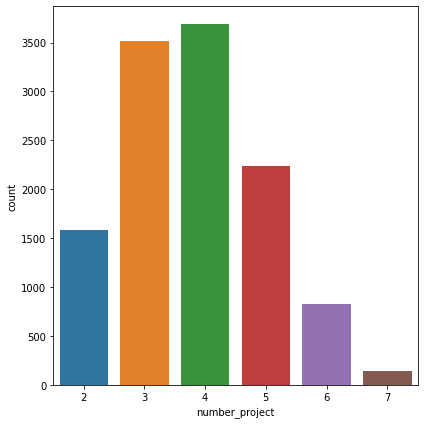

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x=df["number_project"])
plt.tight_layout()
plt.show()

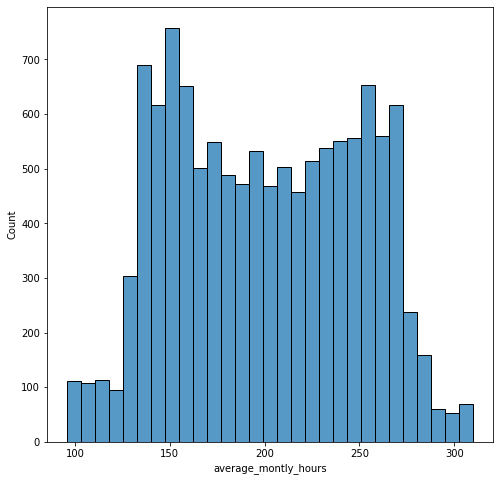

In [ ]:
#average_montly_hours histplot
plt.figure(figsize=(8,8))
sns.histplot(data=df,x=df["average_montly_hours"])
plt.show()

In [ ]:
#how many of them are promoted and how many are not
c=df["promotion_last_5years"]

In [ ]:
print(c)

0        0
1        0
2        0
3        0
4        0
        ..
11995    1
11996    1
11997    1
11998    1
11999    0
Name: promotion_last_5years, Length: 11991, dtype: int64


In [ ]:
labels=df["promotion_last_5years"].value_counts()
labels

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [ ]:
labels=c.value_counts().index.tolist()
labels

[0, 1]

In [ ]:
labels=[ "promoted" if i==1  else "Not Promoted" for i in labels]
labels

['Not Promoted', 'promoted']

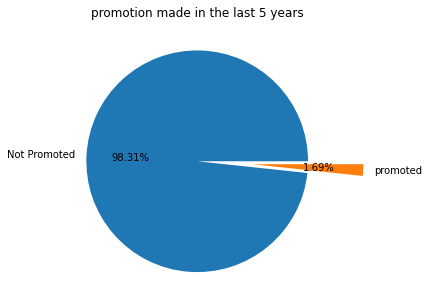

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(x=df["promotion_last_5years"].value_counts(),labels=labels,autopct="%1.2f%%",explode=(0,0.5))
plt.title("promotion made in the last 5 years")
plt.tight_layout()
plt.show()

In [ ]:
# no of years an employee has spent in the company
d=df["time_spend_company"].value_counts()
d

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

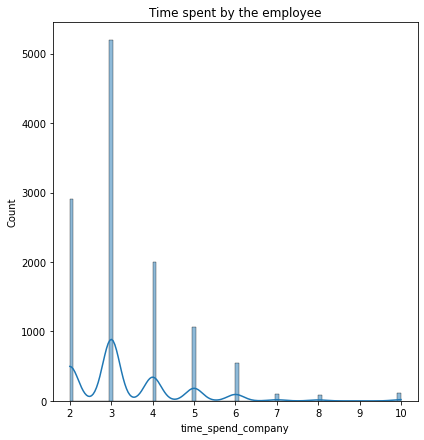

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(data=df,x=df["time_spend_company"],kde=True)
plt.tight_layout()
plt.title("Time spent by the employee")
plt.show()

In [ ]:
df["time_spend_company"].mean()

3.3648569760653824

In [ ]:
e=df["Work_accident"].value_counts()
e

0    10141
1     1850
Name: Work_accident, dtype: int64

In [ ]:
labels=e.index.tolist()
labels

[0, 1]

In [ ]:
labels= [ "NO Accident" if i==0 else "Accident" for i in labels ]
labels


['NO Accident', 'Accident']

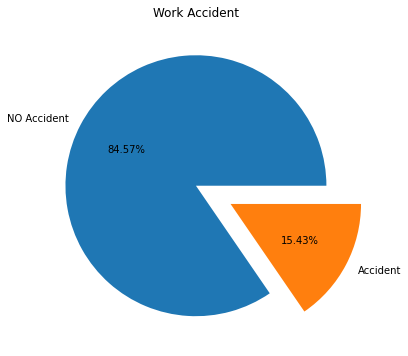

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(x=df["Work_accident"].value_counts(),labels=labels,autopct="%1.2f%%",explode=(0,0.3))
plt.title("Work Accident")
plt.show()

In [ ]:
#comparing the number of employees in various departments
f=df["sales"].unique()
f

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
g=df["sales"].value_counts()
g

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: sales, dtype: int64

In [ ]:
g.index.tolist()

['sales',
 'technical',
 'support',
 'IT',
 'RandD',
 'product_mng',
 'marketing',
 'accounting',
 'hr',
 'management']

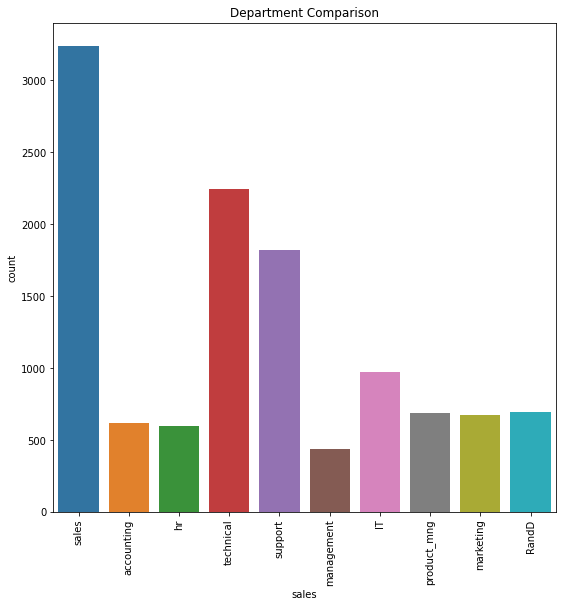

In [ ]:
plt.figure(figsize=(9,9))
sns.countplot(x=df['sales'],data=df)
plt.xticks(rotation=90)
plt.title("Department Comparison")
plt.show()

In [ ]:
labels=df["salary"].unique()
labels

array(['low', 'medium', 'high'], dtype=object)

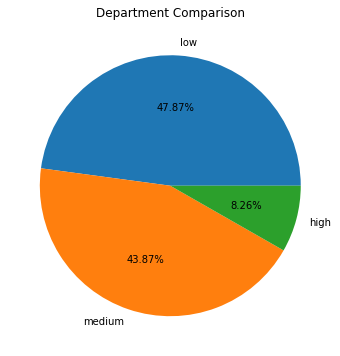

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(x=df['salary'].value_counts(),labels=labels,autopct="%1.2f%%")
plt.title("Department Comparison")
plt.show()

In [ ]:
i=df["salary"].unique()
i

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
j=df["salary"].value_counts()
j

low       5740
medium    5261
high       990
Name: salary, dtype: int64

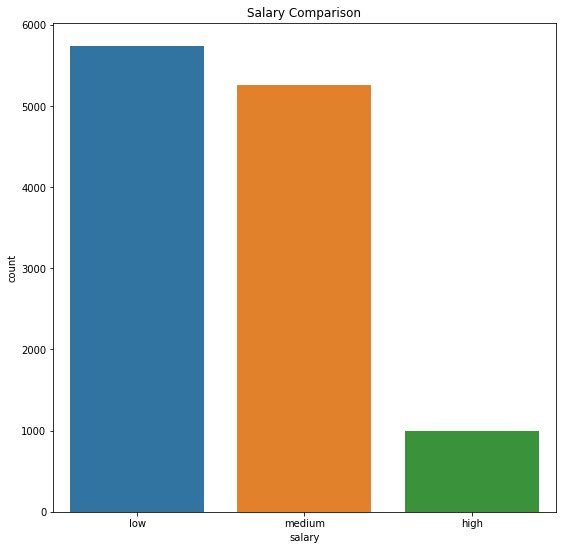

In [ ]:
plt.figure(figsize=(9,9))
sns.countplot(data=df,x=df["salary"])
plt.title("Salary Comparison")
plt.show()

In [ ]:
#in between if i want to change my columns section then rename it
df.rename(columns={"sales": "Department","salary": "salary_level"},inplace=True)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary_level'],
      dtype='object')

In [ ]:
###categorical encoding
categorical_cols=["Department","salary_level"]
encoded_cols=pd.get_dummies(df[categorical_cols],prefix="cat")

In [ ]:
encoded_cols

,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,0,1,0,0,0,0,0,1,0,0
11996,0,0,0,0,1,0,0,0,0,0,1,0,0
11997,0,0,0,0,1,0,0,0,0,0,1,0,0
11998,0,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
df=df.join(encoded_cols)

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_level,...,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
#because we did categorical encoding so we do not need departmet and salary_level column any more
df.drop("Department",axis=1,inplace=True)

In [ ]:
df.drop('salary_level',axis=1,inplace=True)

KeyError: ignored

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'cat_IT', 'cat_RandD',
       'cat_accounting', 'cat_hr', 'cat_management', 'cat_marketing',
       'cat_product_mng', 'cat_sales', 'cat_support', 'cat_technical',
       'cat_high', 'cat_low', 'cat_medium'],
      dtype='object')

In [ ]:
#split data into training ad testing
X=df.drop("left",axis=1)
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
11996,0.74,0.95,5,266,10,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
11997,0.85,0.54,3,185,10,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
11998,0.33,0.65,3,172,10,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
Y=df["left"]
Y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, train_size=0.8)

In [ ]:
X_train.shape

(9592, 21)

In [ ]:
X_test.shape

(2399, 21)

In [ ]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
logReg = LogisticRegression(max_iter=2000)

In [ ]:
logReg.fit(X_train, Y_train)

LogisticRegression(max_iter=2000)

In [ ]:
predictions=logReg.predict(X_test)